# Exploring Bird Detection Data

In [11]:
import sage_data_client

First, we'll get all the the bird detection events in the last 30 days.

In [13]:
df = sage_data_client.query(start="-30d", filter={"name": "env.detection.avian.*"})

Next, we'll check much data each node has for any bird detection.

In [14]:
df.groupby("meta.vsn").size()

meta.vsn
W014     162
W028     483
W029      11
W06D     182
W06F    1105
W084     949
dtype: int64

We'll also take a look at the number of detections per bird and show the top 10.

In [28]:
bird_detections = df.groupby("name").size()

In [29]:
top_10_birds = bird_detections.nlargest(10)
top_10_birds

name
env.detection.avian.picoides_tridactylus        616
env.detection.avian.cephalopterus_penduliger    546
env.detection.avian.nothura_darwinii            200
env.detection.avian.tympanuchus_cupido          134
env.detection.avian.nyctibius_griseus           133
env.detection.avian.podiceps_major               80
env.detection.avian.calypte_anna                 77
env.detection.avian.capito_wallacei              69
env.detection.avian.bubo_virginianus             48
env.detection.avian.crypturellus_erythropus      34
dtype: int64

Now look at that same data as a pie chart.

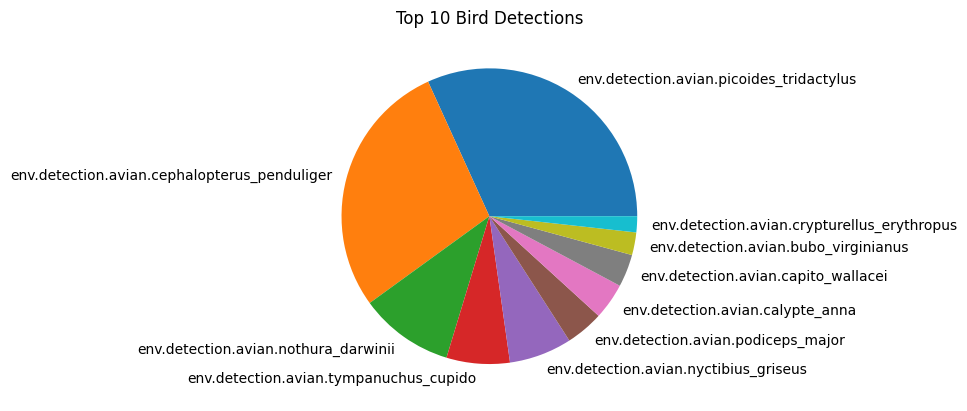

In [33]:
top_10_birds.plot(kind="pie", title="Top 10 Bird Detections");

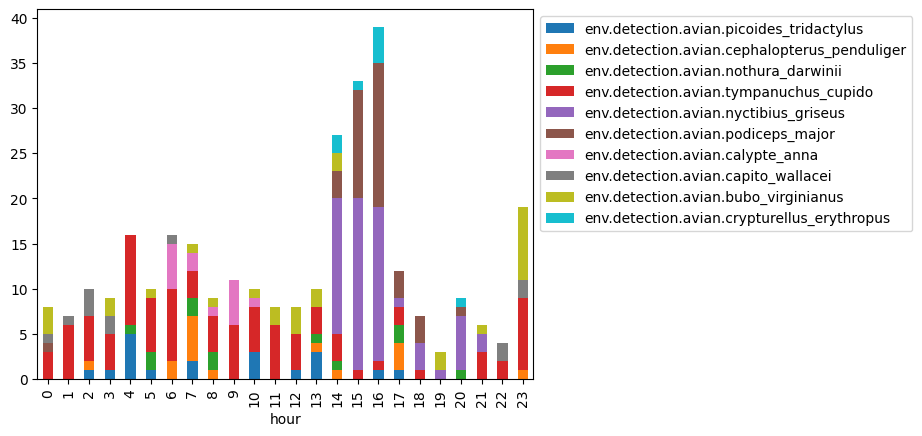

In [34]:
df["hour"] = df["timestamp"].dt.hour
counts = df[df.value > 0.20].pivot_table(index="hour", columns="name", aggfunc="size", fill_value=0)
counts[top_10_birds.index].plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1));

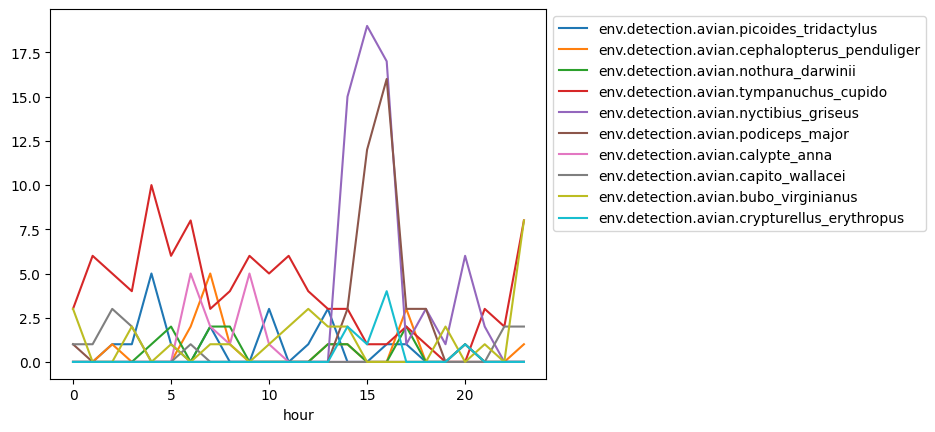

In [35]:
counts = df[df.value > 0.2].pivot_table(index="hour", columns="name", aggfunc="size", fill_value=0)
plots = counts[top_10_birds.index].plot().legend(bbox_to_anchor=(1, 1));